# Analysis of custom filters

compare original fragment library, paulas subset, custom subset

In [1]:
from pathlib import Path

import pandas as pd
from rdkit.Chem import PandasTools

from kinfraglib import utils
from kinfraglib import filters

<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Needed to display ROMol images in DataFrames
PandasTools.RenderImagesInAllDataFrames(images=True)

In [4]:
# Path to data
HERE = Path().resolve()
PATH_DATA = HERE / "../../data"

In [5]:
fragment_library = utils.read_fragment_library(PATH_DATA / "fragment_library")

,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
0,,,,AAK1,NAK,Other,5l4q,LKB,B,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP F...,16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na,Nc1c[nH]c2ncccc12,[11*]c1cnc2[nH]cc(N[27*])c2c1,AP
1,,,,AAK1,NAK,Other,5te0,XIN,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 ...,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,[12*]N/C(=C1\C(=O)Nc2cc([20*])ccc21)c1ccccc1,AP
2,,,,ABL1,Abl,TK,2f4j,VX6,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP SE,5 5 14 14 14 14 14 14 14 8 8 8 8 na,Cc1cc(N)[nH]n1,[22*]Nc1cc(C)n[nH]1,AP
3,,,,ABL1,Abl,TK,2gqg,1N1,B,A,AP AP AP AP AP AP AP AP AP AP GA SE,14 14 14 6 5 5 14 14 14 6 na na,Nc1ncc(C=O)s1,[15*]Nc1ncc(C([41*])=O)s1,AP
4,,,,ABL1,Abl,TK,2v7a,627,,B,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,8 8 8 8 8 5 5 6 6 8 8 8 8 8 8 8 8 8 8 3 3 3 3 ...,COCC(=O)n1cc2[nH]nc(NC=O)c2c1,[8*]C(=O)Nc1n[nH]c2cn(C(=O)[C@@H]([46*])OC)cc12,AP

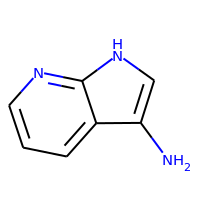
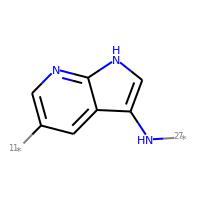
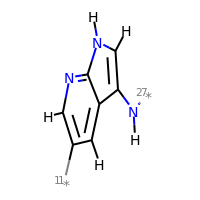
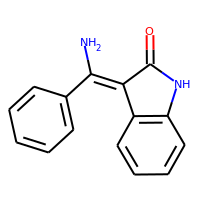
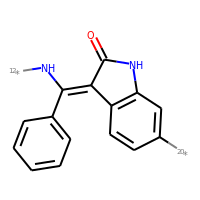
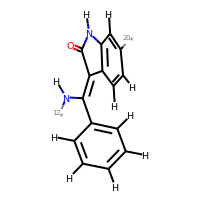
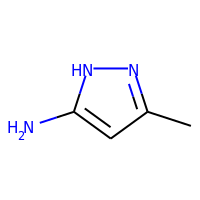
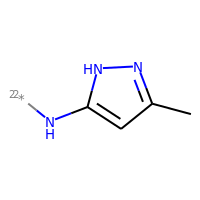
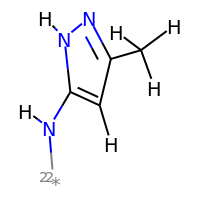
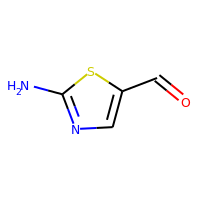
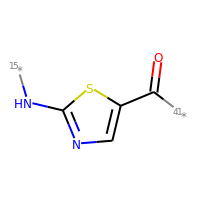
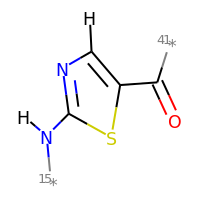
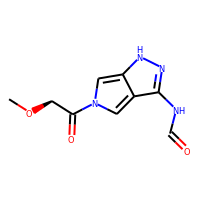
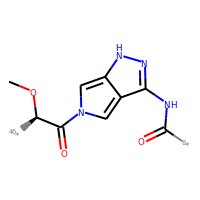
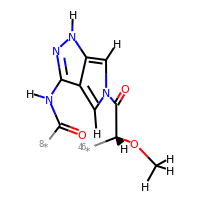

In [6]:
fragment_library['AP'].head()

In [7]:
fragment_library_reduced = utils.read_fragment_library(PATH_DATA / "fragment_library_reduced")

,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
0,,,,AKT2,Akt,AGC,3e87,G95,B,B,AP AP AP AP AP AP AP AP AP AP AP AP AP AP FP,16 16 16 16 16 16 16 16 16 16 16 16 16 16 na,c1cnc2[nH]ccc2c1,*c1ccnc2[nH]ccc12,AP
1,,,,AKT1,Akt,AGC,3ocb,XM1,,B,AP AP AP AP AP AP AP AP AP AP AP AP AP FP,14 14 14 14 14 14 14 14 14 14 14 14 14 na,c1ncc2cc[nH]c2n1,*c1ncnc2[nH]ccc12,AP
2,,,,JAK1,JakA,TK,4e4l,0NH,A,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 na,c1cc2c(ncc3nc[nH]c32)[nH]1,*n1cnc2cnc3[nH]ccc3c21,AP
3,,,,ALK2,STKR,TKL,6gin,IR2,B,B,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP S...,16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 n...,O=c1[nH]cnc2ccccc12,*c1ccc2ncn(*)c(=O)c2c1,AP
4,,,,CK2a1,CK2,CMGC,3nga,3NG,A,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 1...,Nc1nc2ccccc2c2cnccc12,*Nc1nc2cc(*)ccc2c2cnccc12,AP

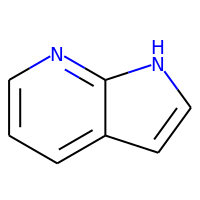
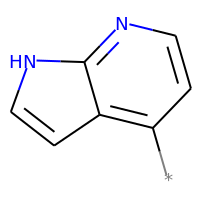
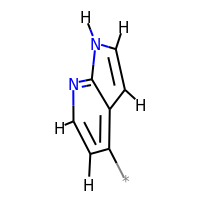
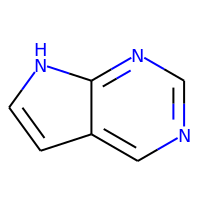
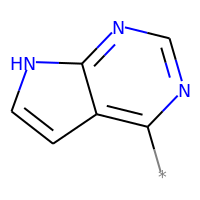
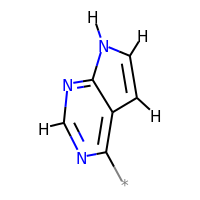
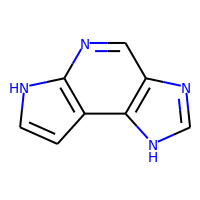
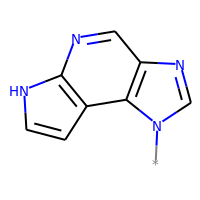
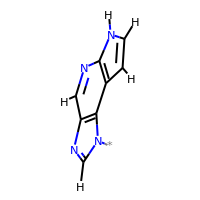
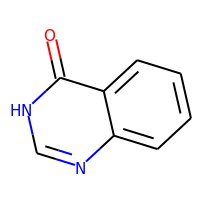
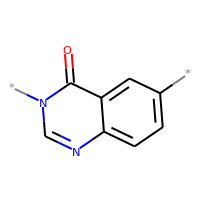
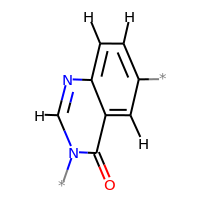
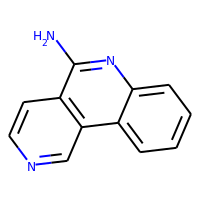
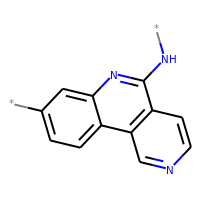
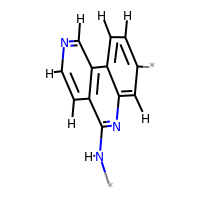

In [8]:
fragment_library_reduced['AP'].head()

In [9]:
def frag_in_subset(fragment_library_original, fragment_library_subset, colname):
    fragment_library_concat = pd.concat(fragment_library_original).reset_index(drop=True)
    fragment_library_reduced_concat = pd.concat(fragment_library_subset).reset_index(drop=True)
    bool_reduced = []
    for i, row in fragment_library_concat.iterrows():
        notfound = True
        for j, reduced_row in fragment_library_reduced_concat.iterrows():
            if row['smiles'] == reduced_row['smiles']:
                bool_reduced.append(1)
                notfound = False
                break
        if notfound:
            bool_reduced.append(0)
    fragment_library_concat[colname] = bool_reduced
    fraglib = filters.prefilters._make_df_dict(fragment_library_concat)
    return(fraglib)

In [10]:
fragment_library = frag_in_subset(fragment_library, fragment_library_reduced, colname = "bool_reduced")

## t-sne plot

compare
    1. original vs. paulas subset
    2. original vs. custom subset
    3. original vs. paulas vs. sonjas subset

In [11]:
from rdkit.Chem import MACCSkeys
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
def create_tsne_plots(fragment_library, colname):
    fragment_library_concat = pd.concat(fragment_library).reset_index(drop=True)
    fragment_library_concat["maccs"] = fragment_library_concat.ROMol.apply(MACCSkeys.GenMACCSKeys)
    
    pca = PCA(n_components=50)
    crds = pca.fit_transform(list(fragment_library_concat["maccs"]))
    
    crds_embedded = TSNE(n_components=2).fit_transform(crds)
    
    tsne_df = pd.DataFrame(crds_embedded,columns=["X","Y"])
    tsne_df['reduced'] = fragment_library_concat[colname] #add bool column from filtering step here
    
    ax = sns.scatterplot(data=tsne_df.query("reduced == 1"),x="X",y="Y",color='lightgreen')
    ax = sns.scatterplot(data=tsne_df.query("reduced == 0"),x="X",y="Y",color='lightcoral')


/home/nona/anaconda3/envs/kinfraglib-dev/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nona/anaconda3/envs/kinfraglib-dev/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


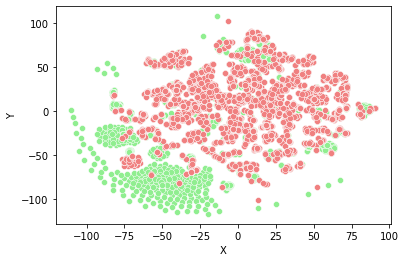

In [12]:
create_tsne_plots(fragment_library, colname="bool_reduced")

## fragment similarity between and across kinase groups

## fragment similarity per subpocket

## fragment properties

1. one for each filter step
2. one for custom filtered library

## conncection frequency

## most common fragments per subpocket